### Alternative Data - Exploration and Visualization

This notebook serves to explore and visualize alternative data:

* AAII (Investor Sentiment) - Weekly
* Big Mac Index - Bi-annual 
* Eureka Multi Factor Risk Premia Index - Monthly
* US Misery Index - Monthly
* Reddit r/WorldNews Sentiment - Daily

In [1]:
import quandl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

In [2]:
aaii = quandl.get("AAII/AAII_SENTIMENT", authtoken="xvRAkcY8ExMFtqF9fEK4")

In [3]:
aaii.sample(3)

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
1989-11-17,0.240000,0.280000,0.48000,1.0000,0.310000,-0.240000,0.384907,0.488293,0.281522,341.61,337.99,341.61
2017-01-05,0.462006,0.285714,0.25228,1.0000,0.455597,0.209726,0.383355,0.485774,0.280937,2273.82,2233.62,2270.75
2006-01-12,0.589600,0.219700,0.19080,1.0001,0.465075,0.398800,0.384907,0.488293,0.281522,1294.90,1283.76,1294.18


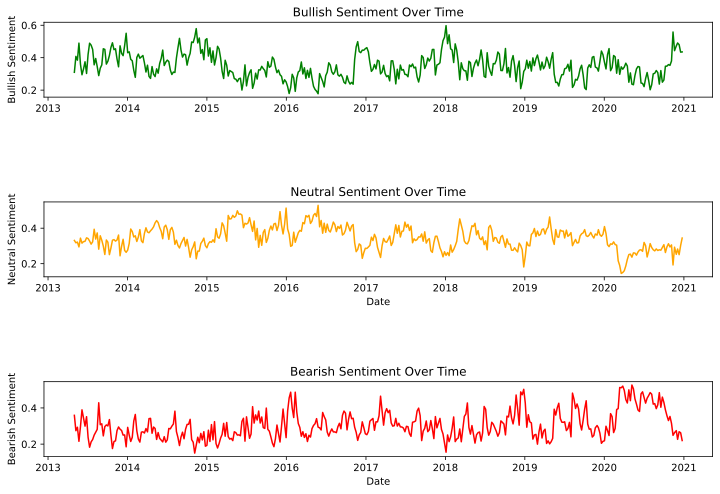

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(5,1,1)
plt.plot(aaii['Bullish'][-400:], color='green')
plt.ylabel('Bullish Sentiment')
plt.title('Bullish Sentiment Over Time')

plt.subplot(5,1,3)
plt.plot(aaii['Neutral'][-400:], color='orange')
plt.xlabel('Date')
plt.ylabel('Neutral Sentiment')
plt.title('Neutral Sentiment Over Time')

plt.subplot(5,1,5)
plt.plot(aaii['Bearish'][-400:], color='red')
plt.xlabel('Date')
plt.ylabel('Bearish Sentiment')
plt.title('Bearish Sentiment Over Time')

plt.show()

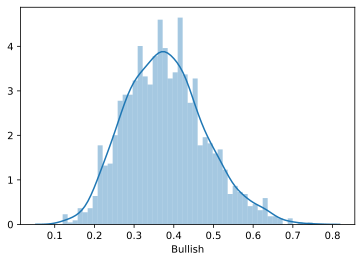

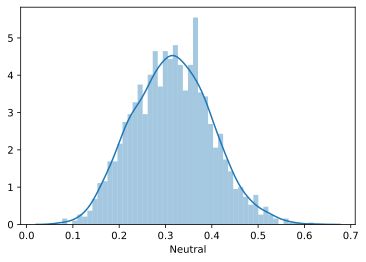

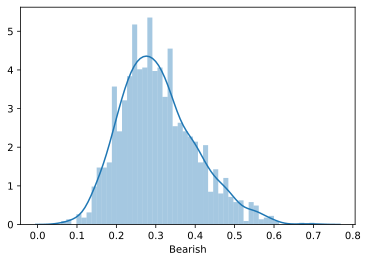

In [5]:
columns = ['Bullish','Neutral','Bearish']
for col in columns:
    sns.distplot(aaii[col], bins=50)
    plt.show()

In [6]:
aaii = aaii[['Bullish','Neutral','Bearish']].pct_change().dropna()
aaii = aaii[['Bullish','Neutral','Bearish']]
aaii = aaii.resample('d').ffill().dropna() #forward fill

#extrapolate last datapoint to today
aaii_days = ((aaii.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
aaii = aaii.append([aaii.tail(1)]*aaii_days)

aaii_index = pd.date_range('1987/07/31', pd.datetime.today())
aaii = aaii.set_index(aaii_index)

<ipython-input-6-1666ff957774>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  aaii_days = ((aaii.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
<ipython-input-6-1666ff957774>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  aaii_index = pd.date_range('1987/07/31', pd.datetime.today())


In [7]:
aaii.tail()

,Bullish,Neutral,Bearish
2020-12-30,0.003275,0.137419,-0.163648
2020-12-31,0.003275,0.137419,-0.163648
2021-01-01,0.003275,0.137419,-0.163648
2021-01-02,0.003275,0.137419,-0.163648
2021-01-03,0.003275,0.137419,-0.163648


### Big Mac Index

In [8]:
bigmac = quandl.get("ECONOMIST/BIGMAC_USA", authtoken="xvRAkcY8ExMFtqF9fEK4")

In [9]:
bigmac.tail()

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2018-07-31,5.51,1.0,5.51,1.0,0.0,0.0,-4.9,9.1,30.0,3.8
2019-01-31,5.58,1.0,5.58,1.0,0.0,0.0,-2.6,13.9,27.2,4.0
2019-07-31,5.74,1.0,5.74,1.0,0.0,0.0,3.6,18.3,33.3,13.4
2020-01-31,5.67,1.0,5.67,1.0,0.0,0.0,2.8,9.1,31.8,9.2
2020-07-31,5.71,1.0,5.71,1.0,0.0,0.0,-1.9,12.2,27.9,7.0


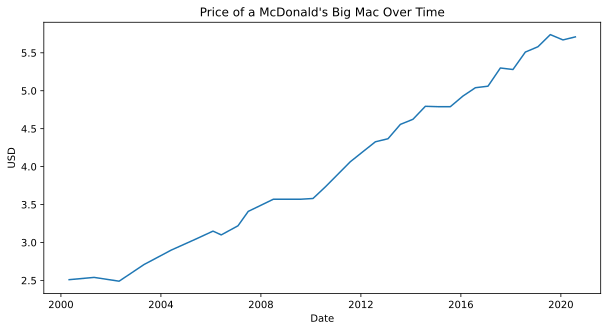

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(bigmac.index, bigmac['local_price'])
plt.xlabel('Date')
plt.ylabel('USD')
plt.title("Price of a McDonald's Big Mac Over Time")
plt.show()

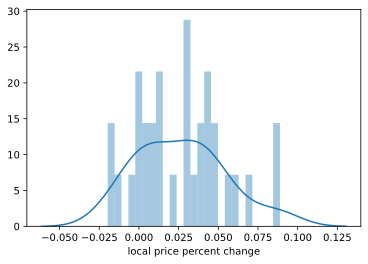

In [11]:
sns.distplot(bigmac['local_price'].pct_change(), bins=25)
plt.xlabel('local price percent change')
plt.show()

In [12]:
bigmac = bigmac['local_price'].pct_change().dropna()
bigmac = pd.DataFrame(bigmac.resample('d').ffill().dropna())

#extrapolate last datapoint to today
bigmac_days = ((bigmac.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
bigmac = bigmac.append([bigmac.tail(1)]*bigmac_days)

bigmac_index = pd.date_range('2001-04-30', pd.datetime.today())
bigmac = bigmac.set_index(bigmac_index)

<ipython-input-12-cdfd15b05562>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  bigmac_days = ((bigmac.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
<ipython-input-12-cdfd15b05562>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  bigmac_index = pd.date_range('2001-04-30', pd.datetime.today())


In [13]:
bigmac.tail(1)

,local_price
2021-01-03,0.007055


### Eureka Multi Factor Risk Premia Index

In [14]:
eureka = quandl.get("EUREKA/MEI27", authtoken="xvRAkcY8ExMFtqF9fEK4")

In [15]:
eureka.tail()

,Returns
Date,
2020-08-31,0.194289
2020-09-30,-0.809626
2020-10-31,-1.445930
2020-11-30,3.040905
2020-12-31,1.117664


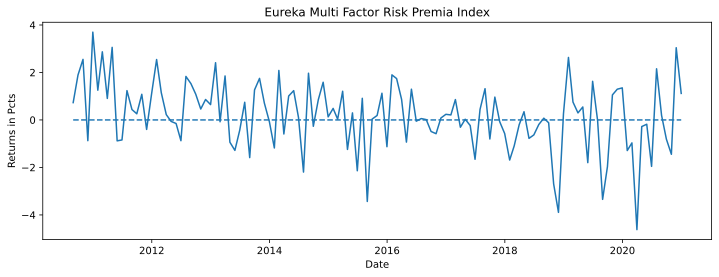

In [16]:
plt.figure(figsize=(12,4))
plt.plot(eureka['Returns'])
plt.hlines(0, eureka.index[0], eureka.index[-1], linestyles='dashed')
plt.title('Eureka Multi Factor Risk Premia Index')
plt.xlabel('Date')
plt.ylabel('Returns in Pcts')
plt.show()

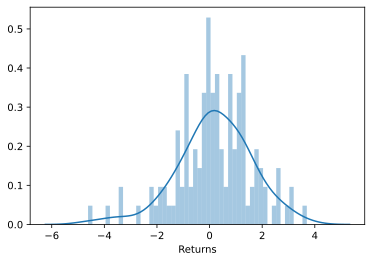

In [17]:
sns.distplot(eureka['Returns'], bins=50)
plt.show()

In [18]:
eureka = eureka['Returns'].pct_change().dropna()
eureka = pd.DataFrame(eureka.resample('d').ffill().dropna())

#extrapolate last datapoint to today
#eureka data updated at weird times so you may have to adjust
eureka_days = ((eureka.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
if eureka_days > 0:
    eureka = eureka.append([eureka.tail(1)]*(eureka_days))
    eureka_index = pd.date_range('2010-09-30', pd.datetime.today())
    eureka = eureka.set_index(eureka_index)

<ipython-input-18-a00cf01bc03a>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  eureka_days = ((eureka.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
<ipython-input-18-a00cf01bc03a>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  eureka_index = pd.date_range('2010-09-30', pd.datetime.today())


In [19]:
eureka.tail(1)

,Returns
2021-01-03,-0.632457


### US Misery Index

In [20]:
misery = quandl.get("USMISERY/INDEX", authtoken="xvRAkcY8ExMFtqF9fEK4")

In [21]:
misery.head(3)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
1948-01-31,3.4,10.23,13.63
1948-02-29,3.8,9.30,13.10
1948-03-31,4.0,6.85,10.85


In [22]:
misery.tail(3)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-09-30,7.9,1.37,9.27
2020-10-31,6.9,1.18,8.08
2020-11-30,6.7,1.17,7.87


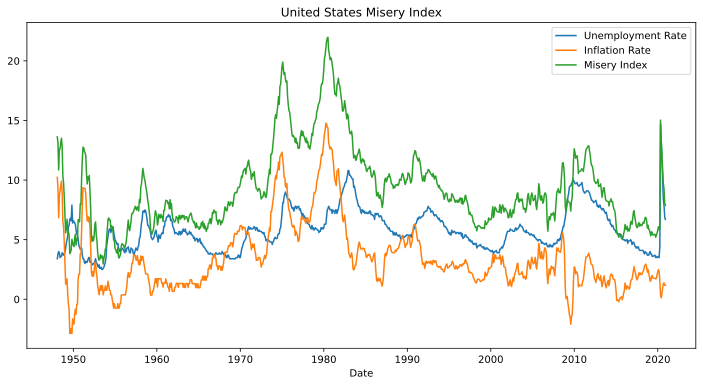

In [23]:
plt.figure(figsize=(12,6))
plt.plot(misery['Unemployment Rate'], label='Unemployment Rate')
plt.plot(misery['Inflation Rate'], label='Inflation Rate')
plt.plot(misery['Misery Index'], label='Misery Index')
plt.title("United States Misery Index")
plt.xlabel('Date')
plt.legend()
plt.show()

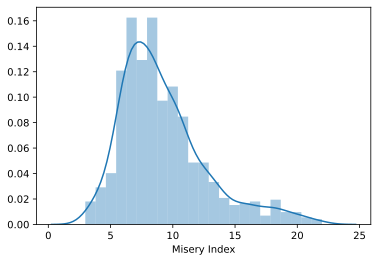

In [24]:
sns.distplot(misery['Misery Index'])
plt.show()

In [25]:
misery = misery[['Unemployment Rate','Inflation Rate','Misery Index']].pct_change().dropna()
misery = misery[['Unemployment Rate','Inflation Rate','Misery Index']]
misery = misery.resample('d').ffill().dropna()

#extrapolate last datapoint to today
misery_days = ((misery.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
misery = misery.append([misery.tail(1)]*misery_days)

misery_index = pd.date_range('1948-02-29', pd.datetime.today())
misery = misery.set_index(misery_index)

<ipython-input-25-92b411a6baf2>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  misery_days = ((misery.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
<ipython-input-25-92b411a6baf2>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  misery_index = pd.date_range('1948-02-29', pd.datetime.today())


In [26]:
misery.tail()

,Unemployment Rate,Inflation Rate,Misery Index
2020-12-30,-0.028986,-0.008475,-0.02599
2020-12-31,-0.028986,-0.008475,-0.02599
2021-01-01,-0.028986,-0.008475,-0.02599
2021-01-02,-0.028986,-0.008475,-0.02599
2021-01-03,-0.028986,-0.008475,-0.02599


In [27]:
reddit = pd.read_csv("Reddit Sentiment/sentiments.csv")

In [28]:
reddit.head(3)

,Date,textblob_sentiment,vader_sentiment
0,2008-06-08,-1,-1
1,2008-06-09,0,-1
2,2008-06-10,-1,-1


In [29]:
reddit.tail(3)

,Date,textblob_sentiment,vader_sentiment
2940,2016-06-29,1,1
2941,2016-06-30,1,-1
2942,2016-07-01,1,-1


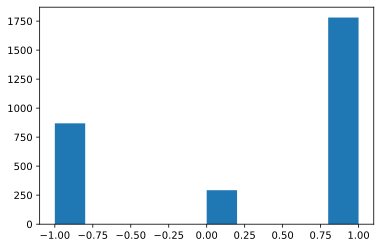

In [30]:
plt.hist(reddit['textblob_sentiment'])
plt.show()

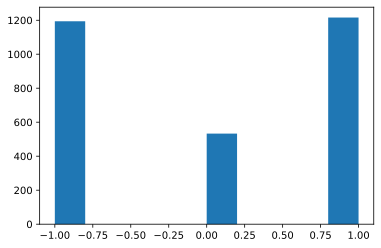

In [31]:
plt.hist(reddit['vader_sentiment'])
plt.show()

In [32]:
reddit.index = pd.to_datetime(reddit['Date'])
reddit.drop('Date', axis=1, inplace=True)

### Merge Alternative Datasets

In [33]:
#alternative_data = eureka.join(misery).join(bigmac).join(aaii).join(reddit)
alternative_data = eureka.join(misery).join(bigmac).join(aaii)
alternative_data.replace([np.inf, -np.inf], np.nan, inplace=True)
alternative_data.dropna(inplace=True)

In [34]:
alternative_data.head(3)

,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish
2010-09-30,1.596909,0.0,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
2010-10-01,1.596909,0.0,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
2010-10-02,1.596909,0.0,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488


In [35]:
alternative_data.tail(3)

,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish
2021-01-01,-0.632457,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648
2021-01-02,-0.632457,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648
2021-01-03,-0.632457,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648


In [36]:
alternative_data.sample(5)

,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish
2013-05-29,-1.506412,-0.013158,-0.278912,-0.056229,0.009219,0.272485,-0.084676,-0.264583
2017-07-18,6.020111,0.023256,-0.128342,-0.022690,0.003968,-0.045197,0.038611,-0.007689
2016-11-11,0.192698,-0.020000,0.123288,0.012384,0.022312,0.645297,-0.244204,-0.145255
2011-02-11,-0.660904,-0.031915,0.086667,-0.015596,0.042831,-0.041521,0.097267,0.001489
2016-06-29,-2.387985,-0.060000,-0.097345,-0.066884,0.029228,-0.133249,0.152080,-0.060605


In [45]:
alternative_data.index.name = 'Date'

In [49]:
alternative_data.to_csv("data/cleaned_alternative_data.csv")

In [50]:
pd.read_csv('data/cleaned_alternative_data.csv')

,Date,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish
0,2010-09-30,1.596909,0.000000,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
1,2010-10-01,1.596909,0.000000,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
2,2010-10-02,1.596909,0.000000,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
3,2010-10-03,1.596909,0.000000,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
4,2010-10-04,1.596909,0.000000,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488
...,...,...,...,...,...,...,...,...,...
3744,2020-12-30,-3.103078,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648
3745,2020-12-31,-0.632457,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648
3746,2021-01-01,-0.632457,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648
3747,2021-01-02,-0.632457,-0.028986,-0.008475,-0.02599,0.007055,0.003275,0.137419,-0.163648
